In [13]:
# Importing necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features (very important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Training a Linear SVM
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Training a RBF Kernel SVM
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.01)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluating both models
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

# Classification reports
print("\nLinear SVM Classification Report:\n", classification_report(y_test, y_pred_linear))
print("\nRBF SVM Classification Report:\n", classification_report(y_test, y_pred_rbf))



Linear SVM Accuracy: 0.9766081871345029
RBF SVM Accuracy: 0.9824561403508771

Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


RBF SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



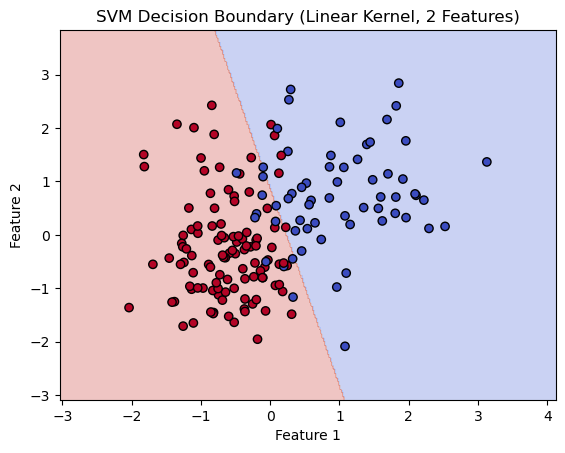

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Use only first two features for visualization
X_vis = data.data[:, :2]
y_vis = data.target

# Split and scale
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)
scaler_vis = StandardScaler()
X_train_vis = scaler_vis.fit_transform(X_train_vis)
X_test_vis = scaler_vis.transform(X_test_vis)

# Train an SVM for 2D plot
svm_2d = SVC(kernel='linear', C=1)
svm_2d.fit(X_train_vis, y_train_vis)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_2d, X_test_vis, y_test_vis, "SVM Decision Boundary (Linear Kernel, 2 Features)")


In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Show best parameters and test accuracy
print("Best Parameters Found:", grid.best_params_)
print("Accuracy with Best Parameters:", grid.best_estimator_.score(X_test, y_test))



Best Parameters Found: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy with Best Parameters: 0.9883040935672515


In [17]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Show best parameters and test accuracy
print("Best Parameters Found:", grid.best_params_)
print("Accuracy with Best Parameters:", grid.best_estimator_.score(X_test, y_test))



Best Parameters Found: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy with Best Parameters: 0.9883040935672515


In [18]:
from sklearn.model_selection import cross_val_score

# Use best model from GridSearch
best_svm = grid.best_estimator_

# Perform 5-fold cross-validation
scores = cross_val_score(best_svm, X, y, cv=5)

# Show cross-validation scores
print("Cross-validation Scores:", scores)
print("Average Cross-validation Accuracy:", scores.mean())


Cross-validation Scores: [0.62280702 0.62280702 0.63157895 0.64035088 0.61946903]
Average Cross-validation Accuracy: 0.6274025772395591
